# 112. Path Sum

<br/>

📎 문제 출처: https://leetcode.com/problems/path-sum/


> Given the `root` of a binary tree and an integer `targetSum`, return `true` if the tree has a **root-to-leaf** path such that adding up all the values along the path equals `targetSum`. <br/><br/>
A leaf is a node with no children.

### 문제 해석
- 이진트리의 `root`와 `targetSum`이라는 정수값이 주어진다.
- 만약 **root-to-leaf** 경로의 노드 값의 합이 `targetSum`과 같으면 true를 반환해라.

### 접근 방법
> root부터 leaf node까지 차례로 targetSum과 비교해 합이 같아지면 True를 반환하기

### 1st-try

In [ ]:
class Solution(object):
    def hasPathSum(self, root, targetSum):

        if not root:
            return False
        
        if root.val == targetSum: # 루트 값이 targetSum과 같으면
            return True
        
        targetSum -= root.val # targetSum에서 루트 값 빼주기
        
        # 재귀적 풀이
        ans = self.hasPathSum(root.left, targetSum) or self.hasPathSum(root.right, targetSum)
        return ans
    
    

# if __name__ == "__main__":
#     root = [5,4,8,11,null,13,4,7,2,null,null,null,1]
#     targetSum = 22
#     s = Solution()
#     print(s.sumNumbers(root))

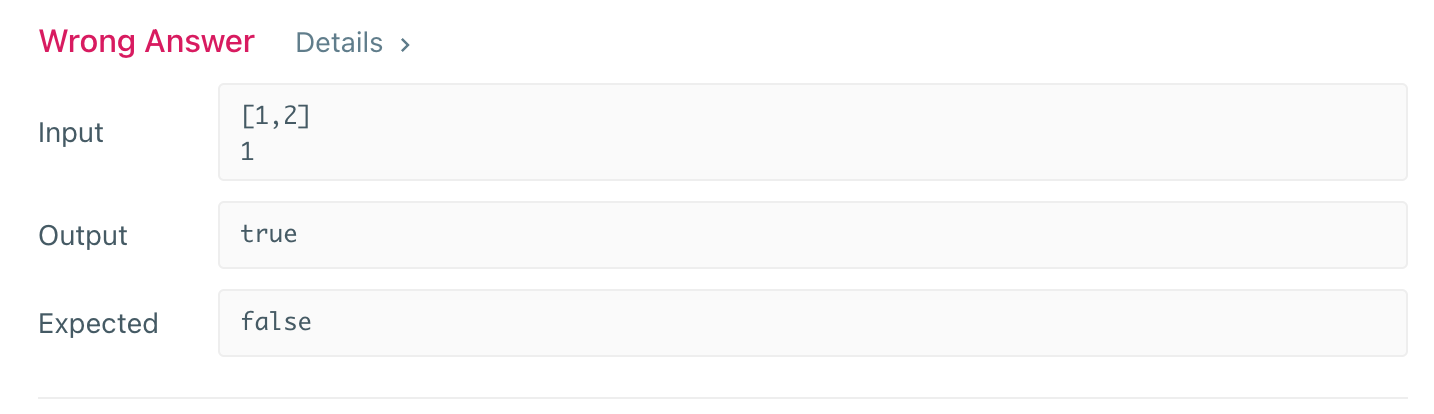

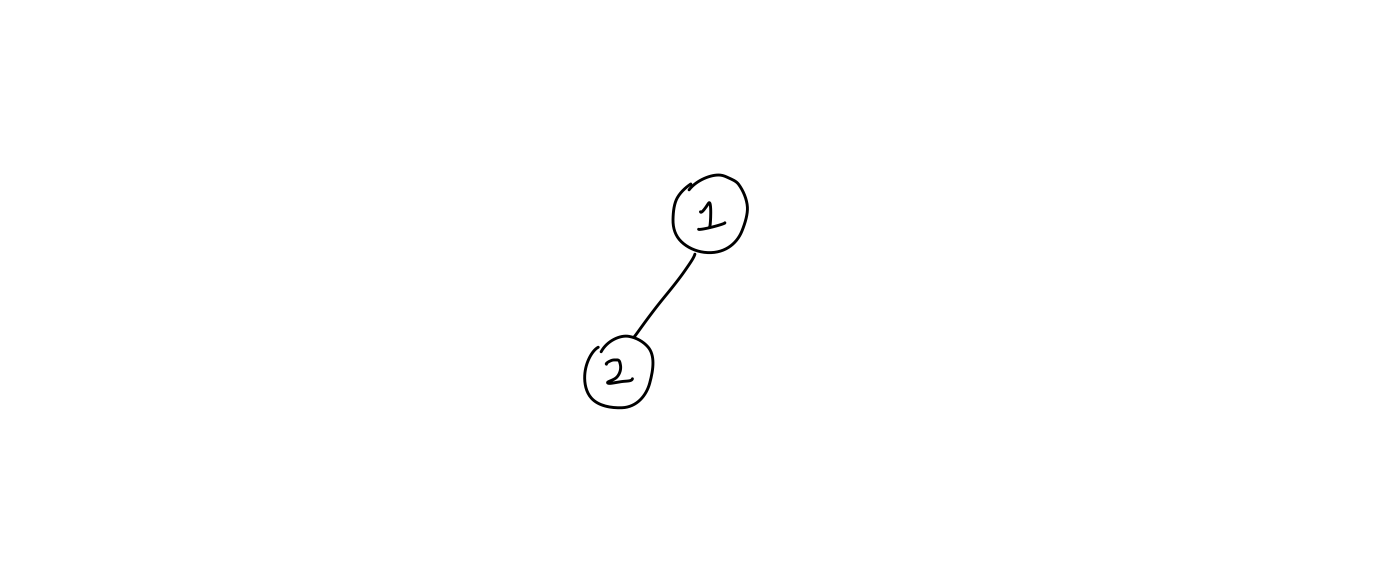
- 만약 root=[1, 2]라면 여기서 sum은 1+2=3 이다.
- 따라서 결과는 false여야 하는데, 두 번째 if문에서 이미 `root.val == targetSum` 조건을 만족시켜 true로 반환됨!
> 따라서 `if not root.left and not root.right` 조건을 추가
> - 만약 루트 노드가 1개여서 `root.val==targetSum` 조건문을 종료하려면, 아래 자식 노드들이 없어야 한다.
> - 따라서 `root.left == False`여서 `not root.left == True`가 되고 `root.right`의 경우도 마찬가지다.
> - 만약 자식 노드가 하라도 있으면 위 조건문이 False이기 때문에 조건식 자체가 False로 if문이 실행되지 않는다.

### 🔆 2nd-try

In [ ]:
class Solution(object):
    def hasPathSum(self, root, targetSum):

        if not root:
            return False
        
        if not root.left and not root.right and root.val == targetSum:
            return True
        
        targetSum -= root.val
        
        ans = self.hasPathSum(root.left, targetSum) or self.hasPathSum(root.right, targetSum)
        return ans

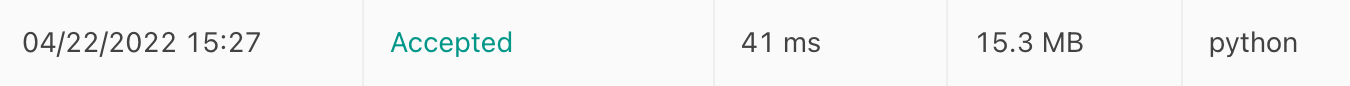

***
### 다른 풀이 (1) - stack

In [ ]:
class Solution(object):
    def hasPathSum(self, root, targetSum):

        if not root:
            return False
        
        stack = [(root, targetSum)]
        
        while stack:
            node, _sum = stack.pop() # 노드와 targetSum 분리
            
            if node.left is node.right is None and node.val == _sum:
#             if not node.left and not node.right and node.val == _sum:
                return True
            
            if node.left:
                stack.append((node.left, _sum - node.val))
                
            if node.right:
                stack.append((node.right, _sum - node.val))
                
        return False

In [20]:
a = [({1, 2}, 3)]
# a.pop()

In [21]:
b, c = a.pop()
print(a)
print(b)
print(c)

[]
{1, 2}
3


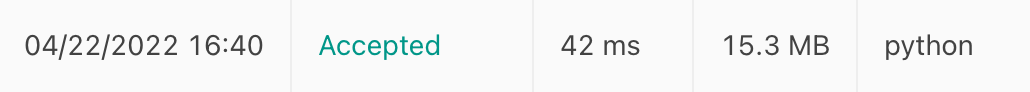